1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


96.73277798311278
53.289142713105825


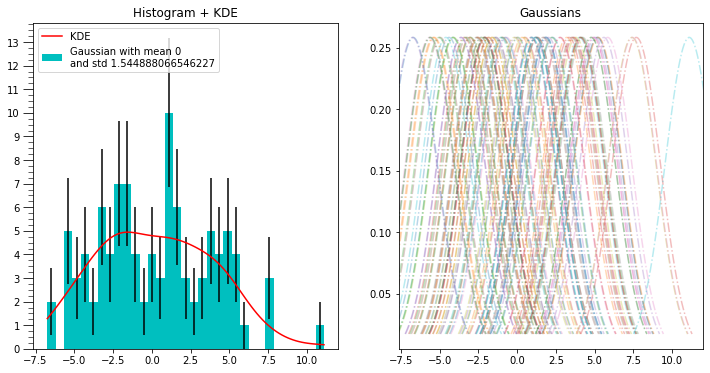

In [141]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import norm
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

N = 100
mean = 0
std = 4

x = np.random.normal(mean,std,N)
# print(x.shape)
# print(x.shape)
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 2, 1)
y = ax.hist(x, bins=N//3, color='c')
# print(y[0])
bin_centers = 0.5*(y[1][1:] + y[1][:-1])
ax.set_title('Histogram + KDE')
ax.tick_params(axis='y', which='major', length = 10)
ax.tick_params(axis='y', which='minor', length = 5)
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
plt.errorbar(bin_centers, y[0], xerr = None, fmt='none', yerr = np.sqrt(y[0][:]),color='k')


# ------------------------------
std = 1.06*x.std()*(x.size**(-1/5))
gaussians = norm(loc=x,scale=std)

ranges = np.linspace(gaussians.ppf(0.01),gaussians.ppf(0.99),N)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Gaussians')
ax2.plot(ranges, gaussians.pdf(ranges), '-.', alpha= 0.3)
ax2.set_xlim(ax.get_xlim())

final_range = np.tile(np.linspace(np.min(x),np.max(x),N),(N,1)).T
KDE = np.sum(gaussians.pdf(final_range),axis=1)
# print(KDE)
integrated_KDE = scipy.integrate.trapz(KDE,final_range[:,0])
print(integrated_KDE)
area_hist = scipy.integrate.trapz(y[0],bin_centers)
print(area_hist)
res = integrated_KDE/area_hist
gaussian_KDE = KDE/res
ax.plot(final_range[:,0], gaussian_KDE, 'r')
ax.legend(['KDE','Gaussian with mean ' + str(mean) + '\nand std ' + str(std)], loc='upper left')
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

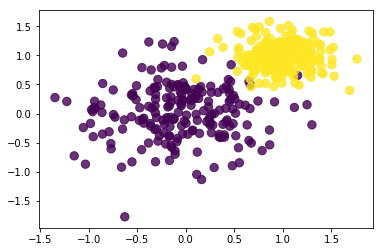

In [245]:
# ! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('/Users/Giacomo/Data/29gp6SI9.png')

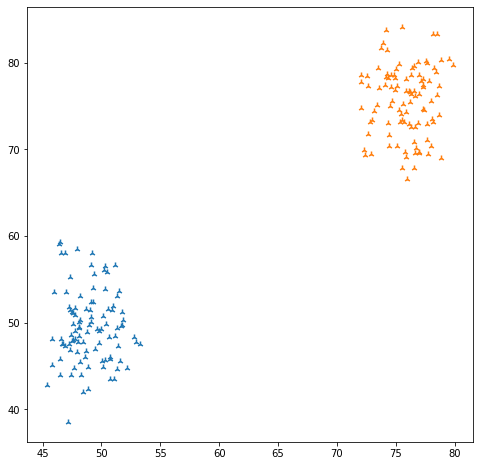

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
# np.random.seed(2005798)
def generation(N,Num_points,means,stds):
    x = [(np.random.normal(mean,std,Num_points),np.random.normal(mean,std,Num_points)) for mean in means for std in stds]
    return x

N = 2 #number of categories
Num_points = 50 #number of samples per category
means = np.random.randint(0,100,N)
stds = np.random.randint(1,6,N)

x = generation(N,Num_points,means,stds)
# print(x)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
for i in range(N):
    ax.scatter(x[2*i],x[2*i+1],marker='2')
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

C:\Users\Giacomo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2.0
[ 1.13967742  2.97765466  4.9798048   6.99921858  9.01260231 10.99656978
 12.96736817 15.02168716 17.00884536 18.94099485]
[0.48732756 0.42182345 0.4262629  0.40975528 0.38458806 0.39801896
 0.43612876 0.46095775 0.44381378 0.42008083]


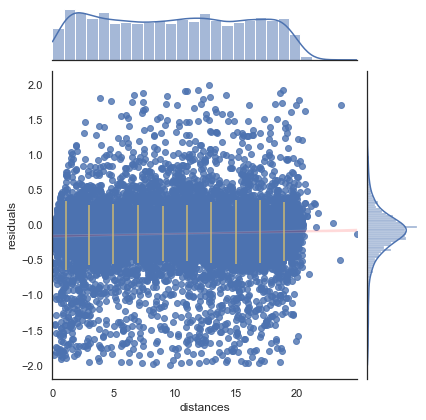

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
file = np.load('/Users/Giacomo/Data/residuals_261.npy', allow_pickle=True)
df = pd.DataFrame(file.item())
filtered_df = df[abs(df['residuals'])<2]
sns.set(style="white", color_codes=True)
[slope, intercept , _,_,_] = scipy.stats.linregress(filtered_df['distances'],filtered_df['residuals'])
ax = sns.jointplot(filtered_df['distances'],filtered_df['residuals'], kind='reg', joint_kws={'line_kws':{'color':'red'}})
sorted_df = filtered_df.sort_values(by='distances')
n_bins = 10
step = 20/n_bins
print(step)
x = np.zeros(n_bins)
erry = np.zeros(n_bins)
for i in range(1,n_bins+1):
    x[i-1] = sorted_df[(sorted_df['distances']<i*step)&(sorted_df['distances']>(i-1)*step)]['distances'].mean()
    erry[i-1] = sorted_df[(sorted_df['distances']<i)&(sorted_df['distances']>i-1)]['residuals'].std()
y = x*slope + intercept
plt.errorbar(x,y,color='y',fmt='none', yerr = erry)
plt.show()